# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer
import random
import math

#założenia globalne
global epsilon, a, b
epsilon_list = [10**-14, 10**-12, 10**-8, 10**-4]
eps = 0
epsilon = epsilon_list[eps]
a = (-1.0, 0.0)
b = (1.0, 0.1)


# Przydatne funkcje 

In [ ]:
def draw_points(points, weight = 10):
    vis = Visualizer()
    vis.add_point(points, s=weight, color='green')
    vis.show()

In [ ]:
def draw_line(points_left, points_mid, points_right, a, b, weight = 10):
    vis = Visualizer()
    vis.add_line((a, b), color='red')
    vis.add_point(points_left, s= weight, color=['green'])
    vis.add_point(points_mid, s= weight, color=['purple'])
    vis.add_point(points_right, s= weight, color=['orange'])
    vis.show()

In [ ]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='purple')
    vis.add_point((6, 6), s=30, color='orange')
    vis.add_point((7, 4), s=30, color='green')
    vis.show()

In [ ]:
def printResults(left, mid, right):
    print(f"Punkty po lewej: {len(left)}\nPunkty współliniowe: {len(mid)}\nPunkty po prawej: {len(right)}\n")

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

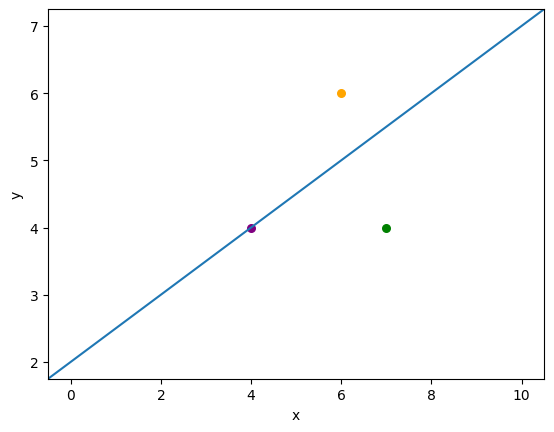

In [ ]:
draw_example()

# Generowanie losowych punktów na płaszczyźnie

In [ ]:
def generate_uniform_points(left, right, n = 10 ** 5):
    tab = []
    for _ in range(n):
        x = random.randint(left, right)
        y = random.randint(left, right)
        tab.append((x,y))
    return tab
    raise Exception("Unimplemented")

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [ ]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

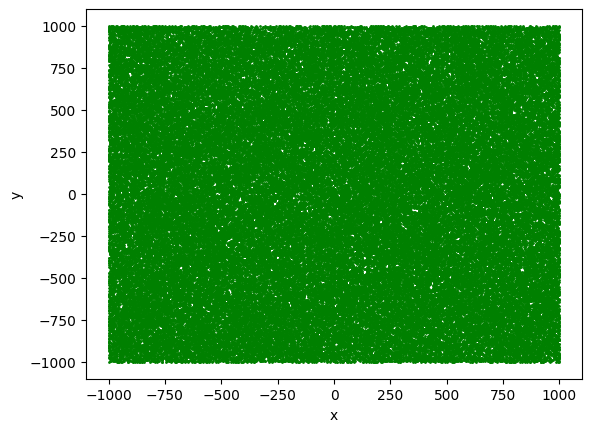

In [ ]:
draw_points(points_a, 1)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$.

In [ ]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

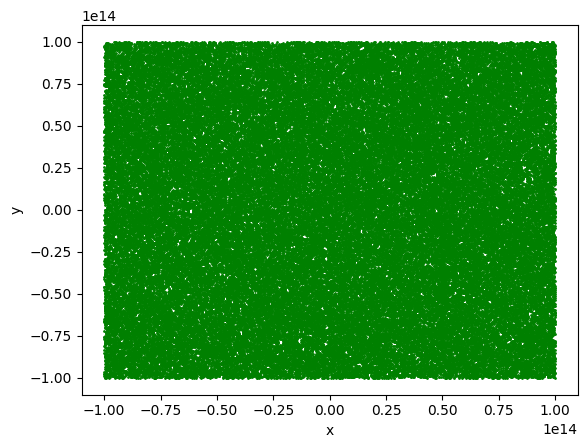

In [ ]:
draw_points(points_b, 1)

In [ ]:
def generate_circle_points(O, R, n = 100):
    tab = []
    for i in range(n):
       # a = (360 / n) * i
        a = random.uniform(0, 2 * math.pi)
        y = math.sin(a) * R #max 1 * r
        x = math.cos(a) * R #min 0 * r
        tenp = (x + O[0], y + O[1])
        tab.append(tenp)

    return tab

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 


In [ ]:
points_c = generate_circle_points((0, 0), 100, 1000)

Zwizualizuj wygenerowane punkty.

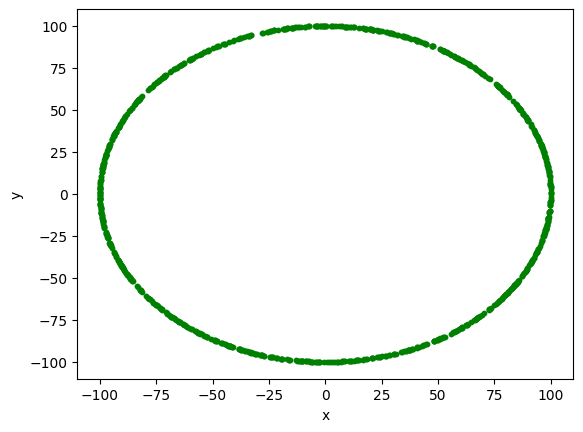

In [ ]:
draw_points(points_c)

In [ ]:
def generate_collinear_points(a, b, n=100):

    tab = []
    for i in range(n):
        pkt = (a[0] + (b[0] - a[0]) * (i/n), a[1] + (b[1] - a[1]) * (i/n))
        tab.append(pkt)
    return(tab)


<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. 

In [ ]:
points_d= generate_collinear_points(a, b)

Zwizualizuj wygenerowane punkty.

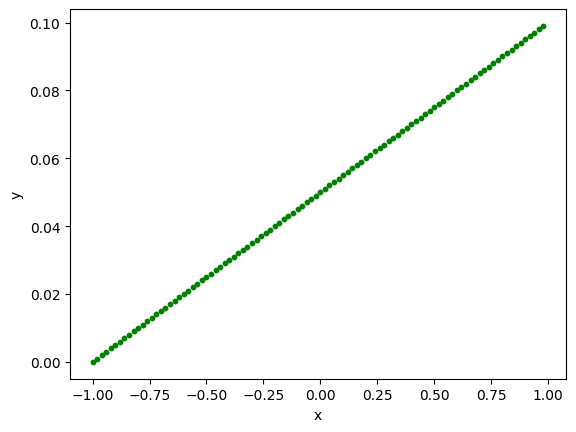

In [ ]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [ ]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.234s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

In [ ]:
def mat_det_3x3(a, b, c):

    return a[0]*b[1]*1 + b[0]*c[1]*1 + a[1]*c[0]*1 - b[1]*c[0]*1 - a[1]*b[0]*1 - a[0]*c[1]*1
    

In [ ]:
def mat_det_3x3_lib(a, b, c):

    matrix = np.array([[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]])
    det = np.linalg.det(matrix)
    return det


In [ ]:
def mat_det_2x2(a, b, c):

    return (a[0] - c[0])*(b[1]-c[1]) - (b[0] - c[0])*(a[1] - c[1])


In [ ]:
def mat_det_2x2_lib(a, b, c):
    matrix = np.array([[a[0] - c[0], b[0] - c[0]], [a[1] - c[1], b[1]-c[1]]])
    det = np.linalg.det(matrix)
    return det

Przetestujmy napisane powyżej funkcje.

In [ ]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [ ]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """
    
    tab = [[] for _ in range(3)]
    for p in points:
        res = mat_det_func(a,b,p)
        if res < -eps:
            tab[0].append(p)
        elif res > eps:
            tab[2].append(p)
        elif -eps <= res <= eps:
            tab[1].append(p)
    return tab
    raise Exception("Unimplemented")

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - pomarańczowe, na prostej - fioletowe, na prawo - zielone.

In [ ]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, epsilon)
printResults(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

Punkty po lewej: 50140
Punkty współliniowe: 0
Punkty po prawej: 49860



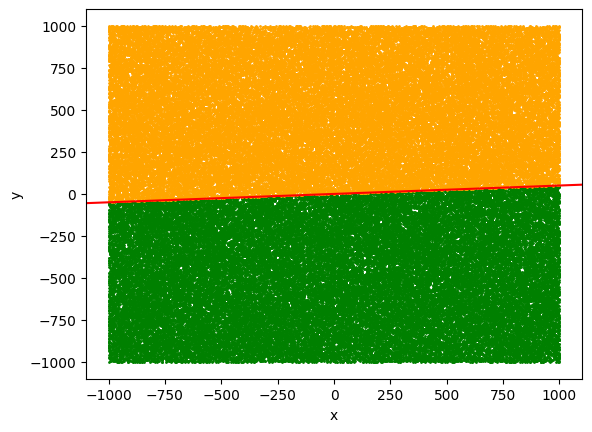

In [ ]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right, a, b, 1)

In [ ]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, epsilon)
printResults(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

Punkty po lewej: 49941
Punkty współliniowe: 0
Punkty po prawej: 50059



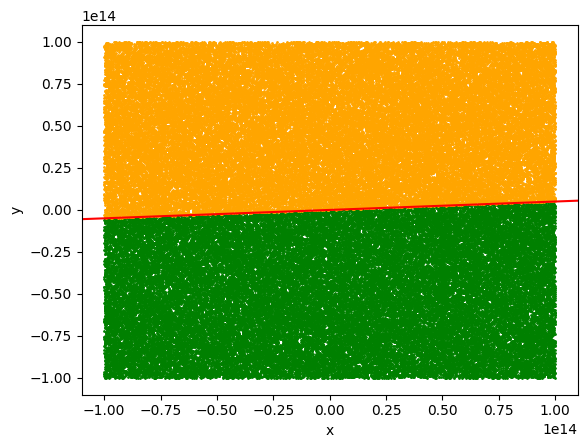

In [ ]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right, a, b, 1)

In [ ]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, epsilon)

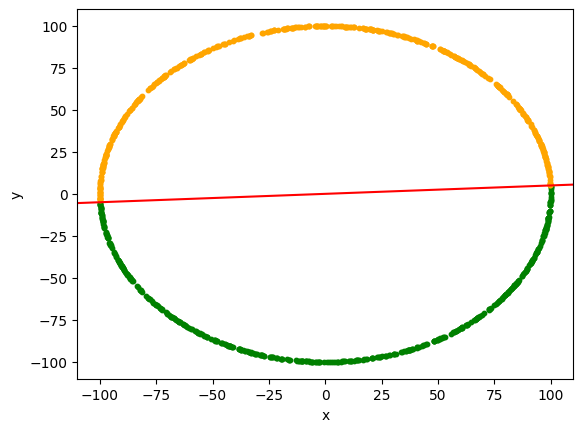

In [ ]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right, a, b)

In [ ]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, epsilon)

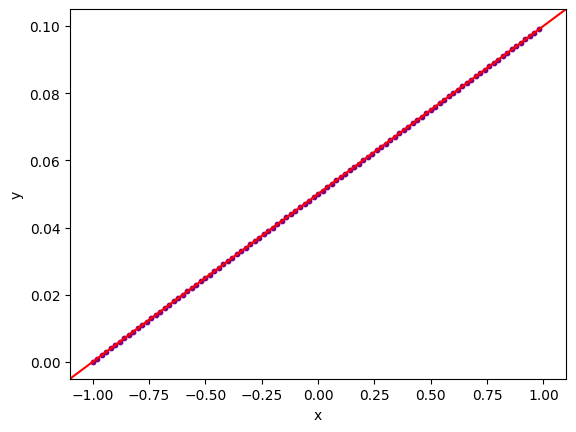

In [ ]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right, a, b)

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [ ]:
points_a_float32 = np.float32(points_a)
points_b_float32 = np.float32(points_b)

Punkty po lewej: 511
Punkty współliniowe: 0
Punkty po prawej: 489

Punkty po lewej: 0
Punkty współliniowe: 100
Punkty po prawej: 0



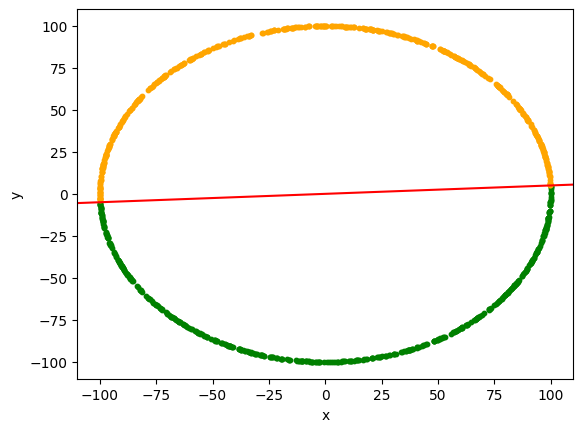

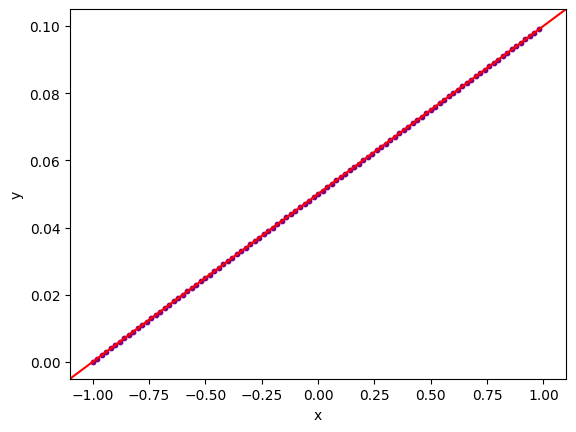

In [ ]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, epsilon)
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right, a, b)
printResults(classified_points_c_left,classified_points_c_mid,classified_points_c_right)

classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, epsilon)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right, a, b)
printResults(classified_points_d_left,classified_points_d_mid,classified_points_d_right)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

In [ ]:
#ODPALANIE TEGO BLOKU NIE JEST REKOMENDOWANE



for epsilon in epsilon_list:

    #
    continue
    #

    #float 64
    classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, epsilon)
    draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right, a, b, 1)
    print(f"A, 3x3, float64, epsilon: {epsilon}")
    printResults(classified_points_a_left,classified_points_a_mid,classified_points_a_right)

    classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_a, a, b, mat_det_3x3_lib, epsilon)
    draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right, a, b, 1)
    print(f"A, 3x3lib, float64, epsilon: {epsilon}")
    printResults(classified_points_b_left,classified_points_b_mid,classified_points_b_right)


    #float 32
    classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a_float32, a, b, mat_det_3x3, epsilon)
    draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right, a, b, 1)
    print(f"A, 3x3, float32, epsilon: {epsilon}")
    printResults(classified_points_a_left,classified_points_a_mid,classified_points_a_right)

    classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_a_float32, a, b, mat_det_3x3_lib, epsilon)
    draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right, a, b, 1)
    print(f"A, 3x3lib, float32, epsilon: {epsilon}")
    printResults(classified_points_b_left,classified_points_b_mid,classified_points_b_right)

    #float 64
    classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2, epsilon)
    draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right, a, b, 1)
    print(f"A, 2x2, float64, epsilon: {epsilon}")
    printResults(classified_points_a_left,classified_points_a_mid,classified_points_a_right)

    classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_a, a, b, mat_det_2x2_lib, epsilon)
    draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right, a, b, 1)
    print(f"A, 2x2lib, float64, epsilon: {epsilon}")
    printResults(classified_points_b_left,classified_points_b_mid,classified_points_b_right)


    #float 32
    classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a_float32, a, b, mat_det_2x2, epsilon)
    draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right, a, b, 1)
    print(f"A, 2x2, float32, epsilon: {epsilon}")
    printResults(classified_points_a_left,classified_points_a_mid,classified_points_a_right)

    classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_a_float32, a, b, mat_det_2x2_lib, epsilon)
    draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right, a, b, 1)
    print(f"A, 2x2lib, float32, epsilon: {epsilon}")
    printResults(classified_points_b_left,classified_points_b_mid,classified_points_b_right)


In [ ]:
for epsilon in epsilon_list:

    #
    continue
    #
    
    #float 64
    classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_b, a, b, mat_det_3x3, epsilon)
    #draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right, a, b, 1)
    print(f"A, 3x3, float64, epsilon: {epsilon}")
    printResults(classified_points_a_left,classified_points_a_mid,classified_points_a_right)

    classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, epsilon)
    #draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right, a, b, 1)
    print(f"A, 3x3lib, float64, epsilon: {epsilon}")
    printResults(classified_points_b_left,classified_points_b_mid,classified_points_b_right)


    #float 32
    classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_b_float32, a, b, mat_det_3x3, epsilon)
    #draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right, a, b, 1)
    print(f"A, 3x3, float32, epsilon: {epsilon}")
    printResults(classified_points_a_left,classified_points_a_mid,classified_points_a_right)

    classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b_float32, a, b, mat_det_3x3_lib, epsilon)
    #draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right, a, b, 1)
    print(f"A, 3x3lib, float32, epsilon: {epsilon}")
    printResults(classified_points_b_left,classified_points_b_mid,classified_points_b_right)

    #float 64
    classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_b, a, b, mat_det_2x2, epsilon)
    #draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right, a, b, 1)
    print(f"A, 2x2, float64, epsilon: {epsilon}")
    printResults(classified_points_a_left,classified_points_a_mid,classified_points_a_right)

    classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, epsilon)
    #draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right, a, b, 1)
    print(f"A, 2x2lib, float64, epsilon: {epsilon}")
    printResults(classified_points_b_left,classified_points_b_mid,classified_points_b_right)


    #float 32
    classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_b_float32, a, b, mat_det_2x2, epsilon)
    #draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right, a, b, 1)
    print(f"A, 2x2, float32, epsilon: {epsilon}")
    printResults(classified_points_a_left,classified_points_a_mid,classified_points_a_right)

    classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b_float32, a, b, mat_det_2x2_lib, epsilon)
    #raw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right, a, b, 1)
    print(f"A, 2x2lib, float32, epsilon: {epsilon}")
    printResults(classified_points_b_left,classified_points_b_mid,classified_points_b_right)


A, 2x2, float32, epsilon: 0.0001
Punkty po lewej: 0
Punkty współliniowe: 100000
Punkty po prawej: 0

A, 2x2, float32, epsilon: 0.0001
Punkty po lewej: 12209
Punkty współliniowe: 75693
Punkty po prawej: 12098

A, 3x3, float64, epsilon: 0.0001
Punkty po lewej: 49941
Punkty współliniowe: 0
Punkty po prawej: 50059



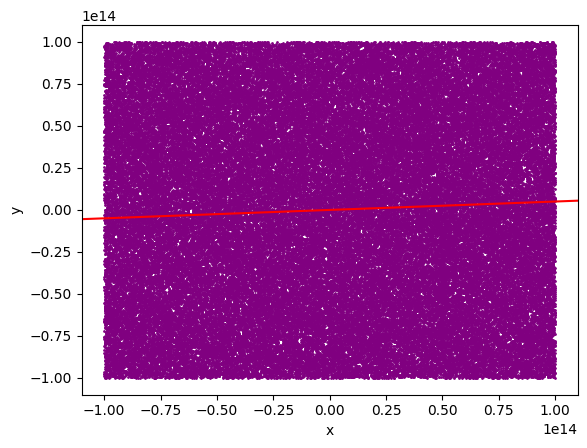

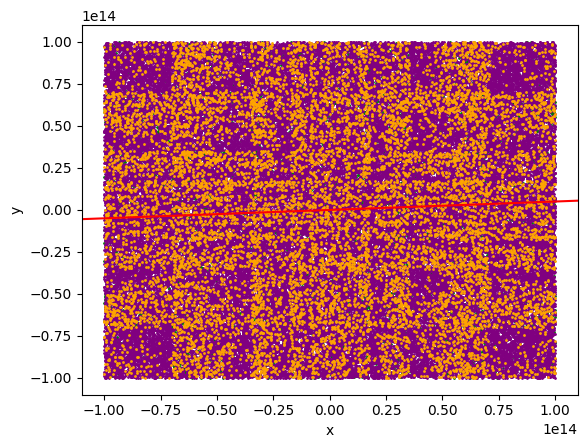

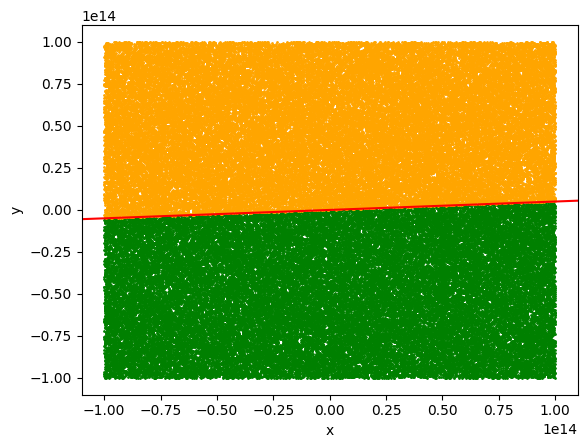

In [ ]:
#src obrazków na ostatnich slajdach
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_b_float32, a, b, mat_det_2x2, epsilon)
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right, a, b, 1)
print(f"A, 2x2, float32, epsilon: {epsilon}")
printResults(classified_points_a_left,classified_points_a_mid,classified_points_a_right)

classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_b_float32, a, b, mat_det_2x2_lib, epsilon)
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right, a, b, 1)
print(f"A, 2x2, float32, epsilon: {epsilon}")
printResults(classified_points_a_left,classified_points_a_mid,classified_points_a_right)

#float 64
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_b, a, b, mat_det_3x3, epsilon)
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right, a, b, 1)
print(f"A, 3x3, float64, epsilon: {epsilon}")
printResults(classified_points_a_left,classified_points_a_mid,classified_points_a_right)

In [ ]:
#src punktów
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_b, a, b, mat_det_2x2, epsilon)
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, epsilon)

print(classified_points_a_mid)
print(classified_points_b_mid)

[(66272324823780, 3308227839517), (96163654653293, 4802294106156), (58678181971545, 2937647177141), (-88079597361836, -4400018288900), (84870104262894, 4257154209833), (58823911364117, 2931724668190), (-85166757949757, -4260843090974), (-94353584409062, -4728917903368)]
[(75583896591303, 3777508188777), (66272324823780, 3308227839517), (96163654653293, 4802294106156), (58678181971545, 2937647177141), (-88079597361836, -4400018288900), (-71613462694379, -3604800975534), (54580017950335, 2736395572653), (-52226572848328, -2612489278569), (-85166757949757, -4260843090974)]


: 

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.


Nie lubię floatów, a zwłaszcza float32

